In [175]:
import requests
from pandas import DataFrame
from bs4 import BeautifulSoup
import re
from datetime import datetime
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

date = str(datetime.now())
date = date[:date.rfind(':')].replace(' ', '_')
date = date.replace(':','시') + '분'

### 키워드 설정 ###
```python
query = '' #'키워드'
```
### 뉴스 갯수 설정###
```python
news_num = #키워드 갯수
```

In [176]:
query =  "프로야구, 우승, 결정, 타이"
news_num = 100 
query = query.replace(' ', '+')


news_url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}'

req = requests.get(news_url.format(query))
soup = BeautifulSoup(req.text, 'html.parser')


news_dict = {}
idx = 0
cur_page = 1

print()
print('크롤링 중...')
while idx < news_num:
### 네이버 뉴스 웹페이지 구성이 바뀌어 태그명, class 속성 값 등을 수정함(20210126) ###
    table = soup.find('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          }
        idx += 1
    cur_page += 1
    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')

text = news_dict[0]['title']
text


크롤링 중...


'프로야구 1위 결정전, 승부치기 없이 무제한 진행…혈투 열리나'

In [177]:
wordcloud = WordCloud(font_path='C:/Users/SeongJun/AppData/Local/Microsoft/Windows/Fonts/NanumPen.ttf').generate(text)

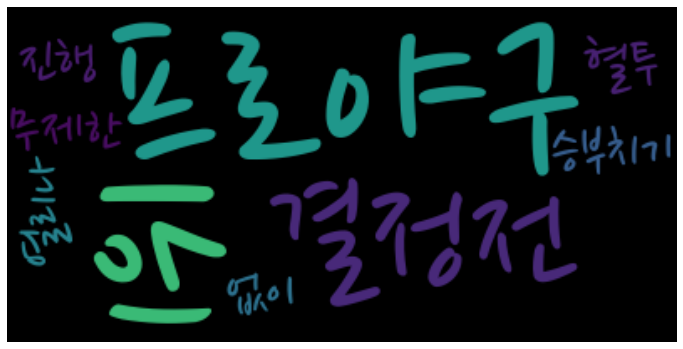

In [178]:
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

nba = pd.read_csv("nba.csv")

# Load data from "nba.csv" and make DataFrame using Pandas
data = pd.DataFrame(nba)
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [180]:
pt = pd.pivot_table(data, index = ["Position", "Team"], values = ["Salary", "Age"])
pt

Age        Salary
Position Team                                       
C        Atlanta Hawks       28.333333  7.585417e+06
         Boston Celtics      25.000000  2.450465e+06
         Brooklyn Nets       27.000000  1.031814e+07
         Charlotte Hornets   25.666667  6.772240e+06
         Chicago Bulls       33.000000  1.042438e+07
...                                ...           ...
SG       Sacramento Kings    26.250000  2.794976e+06
         San Antonio Spurs   31.250000  3.384923e+06
         Toronto Raptors     24.500000  5.350000e+06
         Utah Jazz           23.500000  5.405962e+06
         Washington Wizards  27.250000  2.839248e+06

[149 rows x 2 columns]

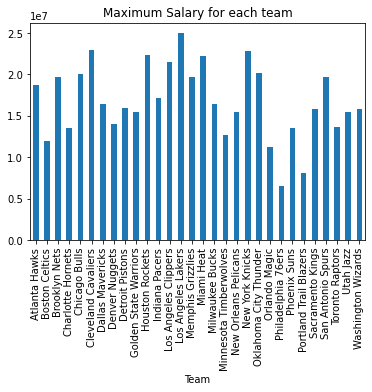

In [181]:
grouped_salary = data.groupby("Team")["Salary"].max()
grouped_salary.describe()

grouped_salary.plot.bar()
plt.title("Maximum Salary for each team")

plt.show()


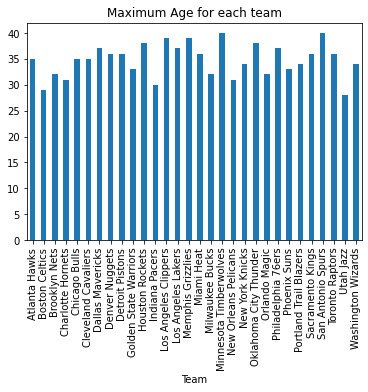

In [182]:
grouped_age = data.groupby("Team")["Age"].max()

grouped_age.plot.bar()
plt.title("Maximum Age for each team")

plt.show()